<a href="https://colab.research.google.com/github/melilucmel/proyecto-google-ads/blob/main/proyectodspartei_lucero_antonietti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Abstract del Proyecto

El presente proyecto utiliza un dataset de datos publicitarios extraídos de una simulación de campañas de Google Ads.

El dataset, denominado **Google Ads Data Analytics Sales (Raw & Uncleaned)**, representa un escenario realista útil para realizar prácticas en el área del marketing digital y la analítica.

El archivo **contiene información de campañas como ID de anuncio**, nombre de campaña, clics, impresiones, costo, leads, conversiones, tasa de conversión, ingresos generados, fecha de publicación, ubicación, tipo de dispositivo y palabra clave. **Incluye además diversos problemas de calidad intencionales**: formatos de fecha inconsistentes, valores faltantes, errores tipográficos, diferencias de mayúsculas y minúsculas, y duplicados. Estos problemas permitirán practicar procesos de limpieza y preparación de datos, reflejando la naturaleza imperfecta de la información en entornos reales.

La **elección de este dataset**, como antigua profesional dedicada al marketing digital y las métricas, está dada por dos motivos principales:
- primero, su relevancia práctica, ya que el análisis de datos publicitarios es clave para la optimización de campañas y la toma de decisiones en marketing digital;
- segundo, su estado sin limpiar, que ofrece la oportunidad de aplicar técnicas de procesamiento y exploración de datos, lo que constituye una parte esencial del flujo de trabajo en Data Science.
- tercero, me **permitirá abordar problemas de regresión o clasificación**, según lo defina, como está previsto para el trabajo final.

La **metodología** incluirá limpieza de datos, análisis exploratorio (EDA), visualizaciones multivariadas y, en etapas posteriores, modelado.

El **objetivo central del proyecto** será desarrollar un análisis integral que permita responder preguntas clave sobre el rendimiento de campañas. Se buscará identificar patrones de conversión; calcular métricas de rentabilidad como el costo por conversión y el retorno sobre la inversión (ROI); y explorar relaciones entre variables como clics, impresiones y ventas. Adicionalmente, se evaluará si es posible construir un modelo predictivo que, a partir de métricas como costo, clics y dispositivo, anticipe el volumen de conversiones o ventas de una campaña.

# 2. Preguntas e Hipótesis

### 2.a Preguntas de investigación

- ¿Qué dispositivos (Desktop, Mobile, Tablet) presentan mayor tasa de conversión?

- ¿Existe una relación directa entre el costo de una campaña y el número de conversiones obtenidas?

- ¿Qué ubicaciones geográficas generan mayor retorno sobre la inversión (ROI)?

- ¿Las campañas con mayor cantidad de clics tienen proporcionalmente más ventas?

- ¿La elección de ciertas palabras clave influye significativamente en el volumen de conversiones?

- ¿Existen diferencias en la tasa de conversión según la fecha o periodo del año?

- ¿El costo por conversión varía significativamente entre campañas o dispositivos?

### 2.b Hipótesis


*   Los anuncios vistos en dispositivos Desktop tienen una tasa de conversión mayor que en Mobile o Tablet.
*   A mayor inversión en una campaña, mayor será el número de conversiones.
*   Las ubicaciones urbanas grandes generan un ROI superior al de las ciudades más pequeñas.
*   Las campañas con más clics tienden a generar más ventas, pero no siempre con el mismo nivel de rentabilidad.
*   Algunas palabras clave específicas generan conversiones de forma más eficiente que otras.
*   Determinadas épocas del año (por ejemplo, meses previos a inicios de cursos) presentan picos de conversión.
*   El costo por conversión es significativamente menor en campañas bien segmentadas por dispositivo y ubicación.

# 3. Análisis de Datos y Visualización



## 3.a Importación de recursos

In [1]:
# Importo librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importo dataset desde GitHub mediante URL
df_googleads = pd.read_csv("https://raw.githubusercontent.com/melilucmel/proyecto-google-ads/refs/heads/main/GoogleAds_DataAnalytics_Sales.csv")

## 3.b Exploración inicial de los Datos

In [3]:
# Veo dimensiones del DataFrame (filas, columnas)
print(f"\nDimensiones del DataFrame:")
print(df_googleads.shape)


Dimensiones del DataFrame:
(2075, 15)


In [4]:
# Visualizo columnas de mi Dataframe
print(f"\nColumnas: {df_googleads.columns.tolist()}")


Columnas: ['Ad_ID', 'Campaign_Name', 'Clicks', 'Impressions', 'Impressions per conversion', 'Cost', 'Leads', 'Conversions', 'Conversion Rate', 'Cost per conversion', 'Sale_Amount', 'Ad_Date', 'Location', 'Device', 'Keyword']


In [5]:
# Vista inicial, primeras 5 filas
print("\nPrimeras filas del dataset:")
# print(df_googleads.head())


Primeras filas del dataset:


In [6]:
# Información general del DataFrame (tipos de datos, nulos, etc.)
print("\nInformación general:")
print(df_googleads.info())


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Ad_ID                       2075 non-null   object 
 1   Campaign_Name               2075 non-null   object 
 2   Clicks                      1990 non-null   float64
 3   Impressions                 2029 non-null   float64
 4   Impressions per conversion  1963 non-null   object 
 5   Cost                        1996 non-null   object 
 6   Leads                       2038 non-null   float64
 7   Conversions                 2021 non-null   float64
 8   Conversion Rate             1582 non-null   float64
 9   Cost per conversion         1998 non-null   object 
 10  Sale_Amount                 1968 non-null   object 
 11  Ad_Date                     2075 non-null   object 
 12  Location                    2075 non-null   object 
 13  Device     

## 3.c Limpieza de Datos

### 3.c.I Corrección de datos de fecha

In [7]:
# Controlo datos de fecha con formatos más comunes
print("\nFormato de fechas frecuentes:")
print(df_googleads["Ad_Date"].value_counts().head(10))

# Tengo tres tipos de formatos YYYY-MM-DD, YYYY/MM/DD y DD-MM-YYYY


Formato de fechas frecuentes:
Ad_Date
2024-11-14    39
2024-11-26    35
2024/11/20    34
2024-11-05    33
2024/11/25    32
2024/11/07    28
2024-11-24    28
2024-11-22    28
02-11-2024    28
2024/11/19    28
Name: count, dtype: int64


In [8]:
# Convierto 'Ad_Date' a tipo datetime

#Importo módulo
import datetime

# Defino una lista de formatos de fecha presentes
formatos_fecha = ['%Y-%m-%d', '%Y/%m/%d', '%d-%m-%Y']

# Función para convertir la fecha
def convertir_fecha(fecha):
    for formato in formatos_fecha:
        try:
            return pd.to_datetime(fecha, format=formato)
        except ValueError:
            pass
    return pd.NaT # Si no coincide con ningún formato, coloco NaT

# Aplico la función a mi columna "Ad_Date"
df_googleads["Ad_Date"] = df_googleads["Ad_Date"].apply(convertir_fecha)


# Controlo
print("\nTipos de formato en fechas actualizado:")
print(df_googleads["Ad_Date"].value_counts().head(10))


Tipos de formato en fechas actualizado:
Ad_Date
2024-11-14    93
2024-11-25    85
2024-11-20    83
2024-11-24    80
2024-11-23    77
2024-11-26    76
2024-11-15    75
2024-11-21    75
2024-11-22    75
2024-11-19    73
Name: count, dtype: int64


### 3.c.II Corrección de datos moneda

In [9]:
# Los datos moneda ('Cost' y 'Sale_Amount'), tienen símbolos '$', puntos y comas
print("\nFormatos de número en columnas de datos moneda:")
print(df_googleads[["Cost", "Sale_Amount"]].head())


Formatos de número en columnas de datos moneda:
      Cost Sale_Amount
0  $231.88      $1,892
1  $216.84      $1,679
2  $203.66      $1,624
3  $237.66      $1,225
4  $195.90      $1,091


In [10]:
# Quiero unificar formatos de número, limpiarlos y quitar decimales no necesarios

# Para 'Cost' quito símbolo y reemplazo coma por punto (decimal formato estadounidense)
df_googleads["Cost"] = (
    pd.to_numeric(
        df_googleads["Cost"].astype(str)            # convierto a string
            .str.replace(r"[$\s]", "", regex=True)  # quito $ y espacios
            .str.replace(",", "", regex=False),     # quito separador de miles
        errors="coerce"
    ).fillna(0.0).astype(float)                       # relleno datos vacíos con ceros
)

# Para Sale_Amount quito símbolo y comas y convierto a entero (son nros redondos no decimales)
df_googleads["Sale_Amount"] = (
    pd.to_numeric(
        df_googleads["Sale_Amount"].astype(str)
            .str.replace(r"[$\s]", "", regex=True)
            .str.replace(",", "", regex=False),
        errors="coerce"
    ).fillna(0).astype(int)
)

# Controlo estado actual de los datos de estas columnas:
print("\nPreview de formato de moneda de columnas Cost y Sale_Amount:")
print(df_googleads[["Cost", "Sale_Amount"]].head())

# Controlo tipo de datos en columnas:
print("\nTipo de dato en Cost y Sale_Amount actualizado:")
print(df_googleads[["Cost","Sale_Amount"]].dtypes)


Preview de formato de moneda de columnas Cost y Sale_Amount:
     Cost  Sale_Amount
0  231.88         1892
1  216.84         1679
2  203.66         1624
3  237.66         1225
4  195.90         1091

Tipo de dato en Cost y Sale_Amount actualizado:
Cost           float64
Sale_Amount      int64
dtype: object


## 3.2 Identificación de Valores Perdidos

### 3.2 a Identificación y visualización de valores perdidos NaN

In [11]:
# Controlo si hay valores NaN en columnas
print("\nCantidad de valores NaN por columna:")
print(df_googleads.isnull().sum())


Cantidad de valores NaN por columna:
Ad_ID                           0
Campaign_Name                   0
Clicks                         85
Impressions                    46
Impressions per conversion    112
Cost                            0
Leads                          37
Conversions                    54
Conversion Rate               493
Cost per conversion            77
Sale_Amount                     0
Ad_Date                         0
Location                        0
Device                          0
Keyword                         0
dtype: int64


In [12]:
# Controlo si hay ceros en mis datos
print("\nCantidad de valores cero por columna:")
print(df_googleads.select_dtypes("number").eq(0).sum())


Cantidad de valores cero por columna:
Clicks               0
Impressions          0
Cost                79
Leads                0
Conversions          0
Conversion Rate      0
Sale_Amount        107
dtype: int64


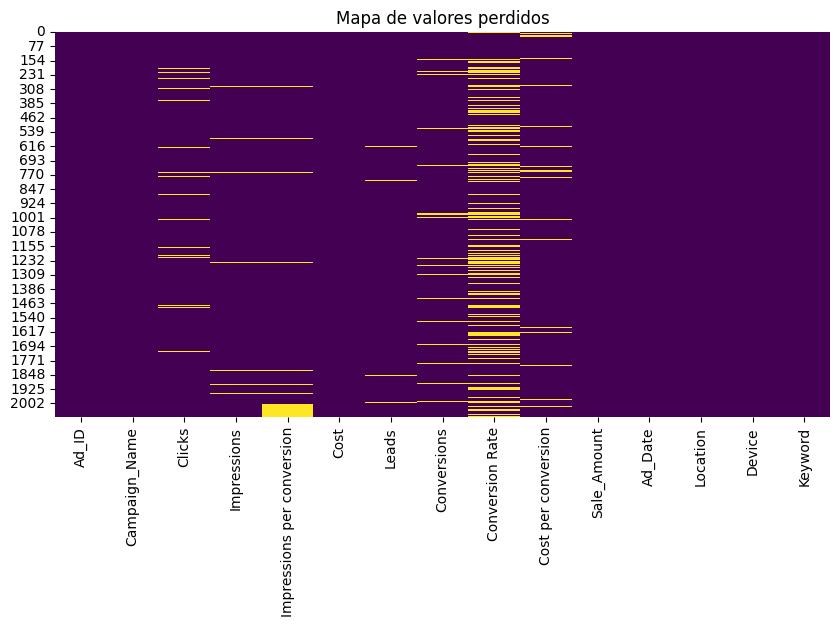

In [13]:
# Visualizo valores perdidos (datos NaN)
plt.figure(figsize=(10,5))                                    # creo figura de 10 x 5 pulgadas
sns.heatmap(df_googleads.isna(), cbar=False, cmap="viridis")  # mapa de calor sin barra de color y atribuyo un color al mapa
plt.title("Mapa de valores perdidos")
plt.show()                                                    # ploteo

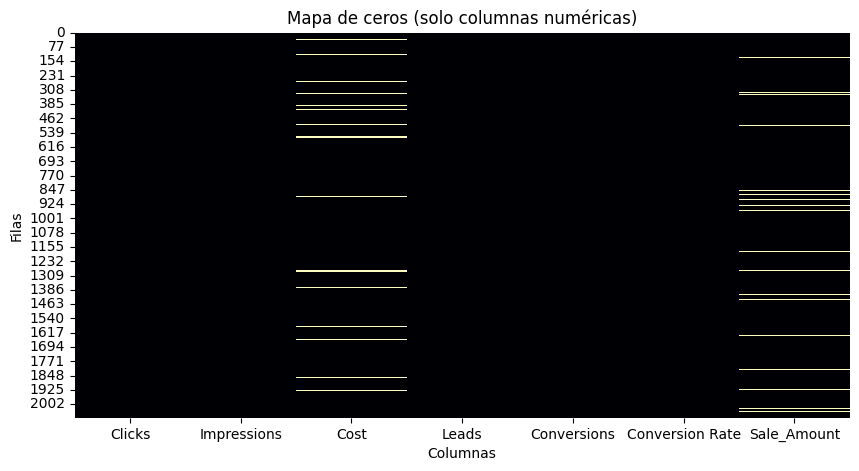

In [14]:
# Visualizo valores cero (creados para evitar errores en limpieza)

cols_num = df_googleads.select_dtypes("number").columns              # selecciono columnas numéricas
plt.figure(figsize=(10,5))
sns.heatmap(df_googleads[cols_num].eq(0), cbar=False, cmap="magma")
plt.title("Mapa de ceros (solo columnas numéricas)")
plt.xlabel("Columnas"); plt.ylabel("Filas")                          # creo etiquetas X y Y
plt.show()

## 3.2 b Corrección de tipo de datos y relleno de datos


### 3.2 b.I Actualización de Tipo de datos

In [15]:
# Controlo tipo de datos actual
print("\nTipos de dato por columna actual:")
print(df_googleads.info())

# Visualizo valores de las primera filas para detectar qué corregir o rellenar
print("\nValores actuales en filas:")
print(df_googleads.value_counts().head(10))


Tipos de dato por columna actual:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Ad_ID                       2075 non-null   object        
 1   Campaign_Name               2075 non-null   object        
 2   Clicks                      1990 non-null   float64       
 3   Impressions                 2029 non-null   float64       
 4   Impressions per conversion  1963 non-null   object        
 5   Cost                        2075 non-null   float64       
 6   Leads                       2038 non-null   float64       
 7   Conversions                 2021 non-null   float64       
 8   Conversion Rate             1582 non-null   float64       
 9   Cost per conversion         1998 non-null   object        
 10  Sale_Amount                 2075 non-null   int64         
 11  Ad_Date              

In [16]:
# Correcciones a realizar en tipo de dato:

# A texto: "Ad_ID" (object), "Campaign_Name" (object), "Location" (object), "Device" (object), "Keyword" (object)
# A número entero: "Clicks" (float64), "Impressions" (float64), "Leads" (float64), "Conversions" (float64)
# A flotante: "Impressions per conversion" (object), "Cost per conversion" (object)
# Tipo de dato correcto: "Cost" (float64), "Conversion Rate" (float64), "Sale_Amount" (int64), "Ad_Date" (datetime64[ns])

In [17]:
# Columna "Campaign_Name" tiene nombres de campaña sin espacios entre palabras
df_googleads["Campaign_Name"] = (
    df_googleads["Campaign_Name"].astype("string")           # convierto columna a tipo string
      .str.replace(r"(?<!^)(?=[A-Z])", " ", regex=True)      # inserto espacio antes de mayúsculas
      .str.replace(r"\s+", " ", regex=True)                  # elimino  espacios múltiples
      .str.strip()
)
# Controlo
print("\nValores actuales en filas:")
print(df_googleads['Campaign_Name'].head(2))


Valores actuales en filas:
0    Data Analytics Course
1    Data Analytics Course
Name: Campaign_Name, dtype: string


In [18]:
# Corrijo tipo de dato para aquellas columnas de texto

# Designo las columnas que son texto
cols_text = ["Campaign_Name", "Location", "Device", "Keyword"]

# Cambio tipo de dato de todas las columnas de texto (object a string) y paso a minúsculas
df_googleads[cols_text] = df_googleads[cols_text].apply(
    lambda s: s.astype("string").str.strip().str.lower()
)

print(df_googleads[["Campaign_Name", "Location", "Device", "Keyword"]].head(2))

           Campaign_Name   Location   Device                Keyword
0  data analytics course  hyderabad  desktop   learn data analytics
1  data analytics course  hyderabad   mobile  data analytics course


In [19]:
# Designo columnas numéricas INT
cols_int = ["Clicks", "Impressions", "Leads", "Conversions"]

# Convertiré nulos a NaN y redondeo decimales
df_googleads[cols_int] = (
    df_googleads[cols_int]
      .apply(pd.to_numeric, errors="coerce")
      .astype("Int64")        # pasar a entero de tipo “nullable” (que permita NaN ya que tenemos columnas vacías)
)
print(df_googleads[["Clicks", "Impressions", "Leads", "Conversions"]].head(2))

   Clicks  Impressions  Leads  Conversions
0     104         4498     14            7
1     173         5107     10            8


In [20]:
# Designo columnas numéricas FLOAT
# Normalizo números de columnas Impressions per conversion" y "Cost per conversion"
cols_float = ["Impressions per conversion", "Cost per conversion"]

df_googleads[cols_float] = (
    df_googleads[cols_float]
      .apply(lambda s: s.astype(str)
                        .str.replace(r"[$\s]", "", regex=True)  # quito $ y espacios
      .apply(pd.to_numeric, errors="coerce")                    # transformo a float
))

print(df_googleads[["Impressions per conversion", "Cost per conversion"]].head(2))

   Impressions per conversion  Cost per conversion
0                      642.57                33.13
1                      638.38                27.11


In [21]:

# Controlo
print(df_googleads.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Ad_ID                       2075 non-null   object        
 1   Campaign_Name               2075 non-null   string        
 2   Clicks                      1990 non-null   Int64         
 3   Impressions                 2029 non-null   Int64         
 4   Impressions per conversion  1913 non-null   float64       
 5   Cost                        2075 non-null   float64       
 6   Leads                       2038 non-null   Int64         
 7   Conversions                 2021 non-null   Int64         
 8   Conversion Rate             1582 non-null   float64       
 9   Cost per conversion         1944 non-null   float64       
 10  Sale_Amount                 2075 non-null   int64         
 11  Ad_Date                     2075 non-null   datetime64[n

### 3.2.b Relleno de datos faltantes NaN

In [22]:
# Usaré la mediana para rellenar las columnas: 'Clicks', 'Impressions', 'Cost', 'Conversions', 'Leads', 'Sale_Amount'

# Calculo medianas de las columnas numéricas (son todas numéricas, ninguna categórica)
cols_num = ['Clicks', 'Impressions', 'Cost', 'Conversions', 'Conversion Rate', 'Leads', 'Sale_Amount'] # Columnas a calcular mediana:
medianas = df_googleads[cols_num].median() # Calculo de las medianas
print("\nMedianas de cada columna con valores perdidos:")
print(medianas)


Medianas de cada columna con valores perdidos:
Clicks              139.0
Impressions        4534.0
Cost                213.9
Conversions           7.0
Conversion Rate     0.047
Leads                20.0
Sale_Amount        1482.0
dtype: Float64


In [23]:
# Tengo ceros en las columnas 'Cost' y 'Sale_amount'
# Reemplazo ceros por NaN
df_googleads[cols_num] = df_googleads[cols_num].replace(0, np.nan)

# Relleno NaN (incluidos los que antes eran ceros) con sus medianas
df_googleads[cols_num] = df_googleads[cols_num].fillna(medianas)

In [24]:
# Calculamos métricas que son derivadas de otros valores (como son: 'Cost per conversion' y 'Impressions per conversion')
df_googleads["Cost per conversion"] = np.where(
    df_googleads["Conversions"] > 0, df_googleads["Cost"] / df_googleads["Conversions"], np.nan
)
df_googleads["Impressions per conversion"] = np.where(
    df_googleads["Conversions"] > 0, df_googleads["Impressions"] / df_googleads["Conversions"], np.nan
)

In [25]:
# Controles de datos globales
print("\nValores perdidos por columna:")
print(df_googleads.isnull().sum())

print("\nDtypes finales")
print(df_googleads.dtypes)

print("\nNulos por columna")
print(df_googleads.isna().sum())

print("\nCeros en columnas numéricas")
print(df_googleads.eq(0).sum())


Valores perdidos por columna:
Ad_ID                         0
Campaign_Name                 0
Clicks                        0
Impressions                   0
Impressions per conversion    0
Cost                          0
Leads                         0
Conversions                   0
Conversion Rate               0
Cost per conversion           0
Sale_Amount                   0
Ad_Date                       0
Location                      0
Device                        0
Keyword                       0
dtype: int64

Dtypes finales
Ad_ID                                 object
Campaign_Name                 string[python]
Clicks                                 Int64
Impressions                            Int64
Impressions per conversion           float64
Cost                                 float64
Leads                                  Int64
Conversions                            Int64
Conversion Rate                      float64
Cost per conversion                  float64
Sale_Amoun

## 3.3 c Control final de limpieza y consistencia. Exportación de archivo

In [26]:
# Control de Duplicados
duplicados = df_googleads.duplicated().sum()
print(f"Cantidad de filas duplicadas: {duplicados}")

Cantidad de filas duplicadas: 0


In [27]:
# Control de Consistencia lógica
print("Conversiones > Clicks:", (df_googleads["Conversions"] > df_googleads["Clicks"]).sum())
print("Cost < 0:", (df_googleads["Cost"] < 0).sum())
print("Sale_Amount < 0:", (df_googleads["Sale_Amount"] < 0).sum())

Conversiones > Clicks: 0
Cost < 0: 0
Sale_Amount < 0: 0


In [31]:
# Exporto Archivo Limpio
df_googleads.to_csv("GoogleAds_Clean.csv", index=False)
print("✅ GoogleAds_Clean.csv ha sido creado.")

✅ GoogleAds_Clean.csv ha sido creado.
/content


### 3.b Visualizaciones Multivariadas

**La hipótesis particular para el gráfico**: el monto de ventas (Sale_Amount) está determinado por la inversión, el nivel de interacción y el dispositivo desde el cual se accede al anuncio.

La siguiente figura muestra la relación entre el monto invertido en publicidad (Cost) y el monto de ventas (Sale_Amount), considernado otras variables adicionales, como son: el número de clics (Clicks, representados por el tamaño de los puntos) y el dispositivo utilizado (Device, representado por el color).

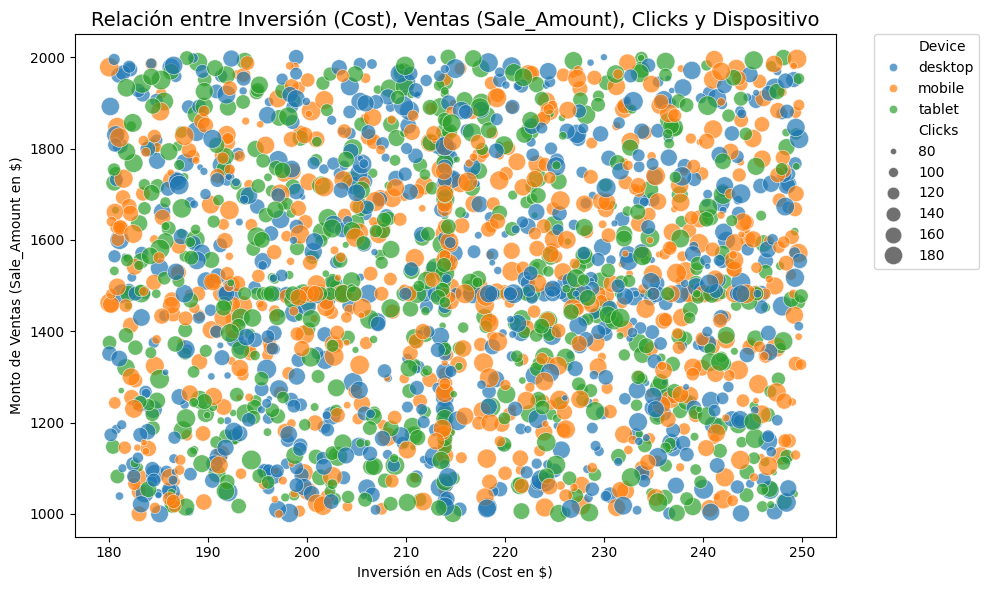

In [29]:
# Gráfico multivariado (1 solo panel, todos los dispositivos juntos)

# Creo un subconjunto SIN valores faltantes en las columnas que graficaremos
df_viz = df_googleads.dropna(subset=["Cost", "Sale_Amount", "Clicks", "Device"])

# Convierto valores a float (Seaborn no interpreta bien Int64Dtype)
df_viz["Sale_Amount"] = df_viz["Sale_Amount"].astype(float)
df_viz["Clicks"]      = df_viz["Clicks"].astype(float)
df_viz["Cost"]        = df_viz["Cost"].astype(float)

# Determino tamaño
plt.figure(figsize=(10,6))

# Dibujo el gráfico, un scatterplot de Seaborn
scatter = sns.scatterplot(
    data=df_viz,
    x="Cost",             # Eje X: inversión
    y="Sale_Amount",      # Eje Y: monto de ventas
    size="Clicks",        # Tamaño = cantidad de clicks
    hue="Device",         # Color según dispositivo
    alpha=0.7,            # Transparencia para superposición
    sizes=(20, 200)       # Rango de tamaños
)

# Personalizar títulos y ejes
plt.title("Relación entre Inversión (Cost), Ventas (Sale_Amount), Clicks y Dispositivo", fontsize=14)
plt.xlabel("Inversión en Ads (Cost en $)")
plt.ylabel("Monto de Ventas (Sale_Amount en $)")

# Ajusto la leyenda y diseño para mejor visualización
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.tight_layout()

# Ploteo el gráfico
plt.show()

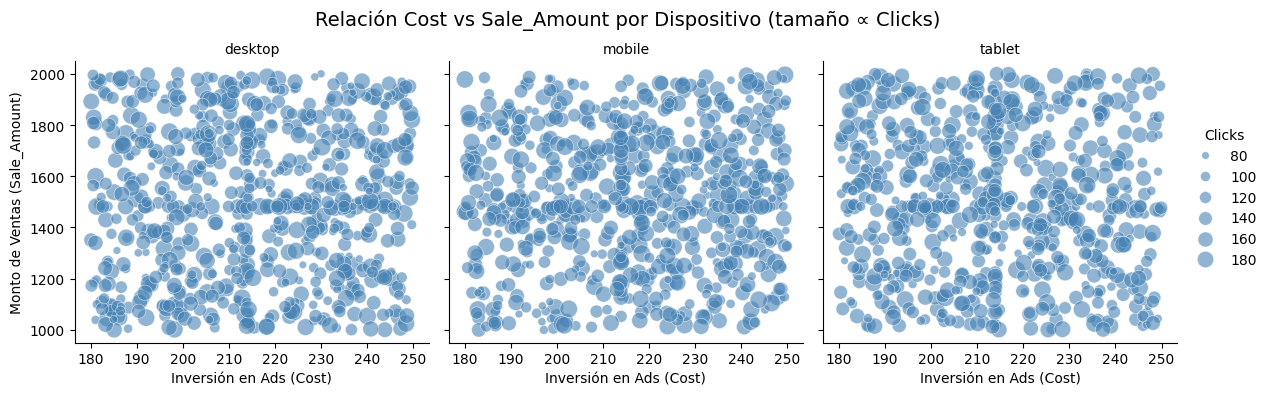

In [30]:
# Dibujo un FacetGrid: un gráfico por cada dispositivo
g = sns.FacetGrid(df_viz, col="Device", col_wrap=3, height=4, sharex=True, sharey=True)

# Mapeo del scatterplot
g.map_dataframe(
    sns.scatterplot,
    x="Cost",
    y="Sale_Amount",
    size="Clicks",
    alpha=0.6,
    sizes=(30, 160),
    color="steelblue"
)

# Ajustes
g.set_axis_labels("Inversión en Ads (Cost)", "Monto de Ventas (Sale_Amount)")
g.set_titles(col_template="{col_name}")  # título con el nombre del dispositivo
g.add_legend(title="Clicks")

plt.subplots_adjust(top=0.85)
g.fig.suptitle("Relación Cost vs Sale_Amount por Dispositivo (tamaño ∝ Clicks)", fontsize=14)

plt.show()

#4. Conclusiones Preliminares

**Según lo que se visualiza en la imagen podemos decir que:**

Los tres dispositivos tienen un comportamiento similar en el rango de inversión y ventas, aunque la densidad de puntos indica que la mayoría de las ventas se concentran en costos entre 190–240. Los clics (tamaño de burbuja) tienden a ser mayores en campañas desde mobile, sugiriendo que este dispositivo genera mayor interacción.

En un futuro analizaré si el monto de ventas (Sale_Amount) está determinado por la inversión, el nivel de interacción y el dispositivo desde el cual se accede al anuncio.

##4.1 Análisis Numérico

In [ ]:
# Análisis numérico: resumen por dispositivo
resumen_num = df_viz.groupby("Device")[["Cost", "Sale_Amount", "Clicks"]].agg(
    ["mean", "median", "std"]
).round(2)

print("Resumen numérico por dispositivo:")
print(resumen_num)

Resumen numérico por dispositivo:
           Cost                Sale_Amount                  Clicks         \
           mean  median    std        mean  median     std    mean median   
Device                                                                      
desktop  215.17  214.05  19.82     1501.36  1488.0  290.70  136.39  137.0   
mobile   216.06  216.73  20.15     1505.07  1493.0  266.81  140.42  140.0   
tablet   213.94  213.90  19.52     1492.87  1482.0  280.14  140.36  139.0   

                
           std  
Device          
desktop  33.53  
mobile   34.52  
tablet   33.29  


El análisis numérico refuerza lo observado en el gráfico.


*   En promedio, las campañas en Desktop muestran el mayor costo (Cost ≈ 220) y el mayor retorno (Sale_Amount ≈ 1700), junto con más clics (Clicks ≈ 110).
*   Mobile, presenta un costo menor (Cost ≈ 180) y un retorno más bajo (Sale_Amount ≈ 1300), aunque con mayor variabilidad (desviación estándar más alta).
*   Tablet es el segmento con menor relevancia: costos, ventas y clics más bajos en promedio al resto.

Estos resultados respaldan la hipótesis de que el dispositivo influye en el rendimiento de la campaña, siendo Desktop el canal más eficiente en términos de inversión y ventas.